# Credit Card Fraud Detection

### Intro

Credit Card Fraud is defined as the misuse of credit card details to make unauthorised purchases. Rise in e-commerce transactions has meant that use of credit cards has increased exponentially along with other e-payment services. It is estimated that more than $24 billion usd per year are lost to fraudulent transactions. Automating fraduluent transaction detection, therefore, is paramount. 

### Aim :

- Build a model to detect labelled fraudulent transactions 
- Test the best algorythm to perform the **binary classification**
- Implement SMOTE (Synthetic Minority Oversampling Technique) to address class imabalance

### Dataset Attributes
    
- **V1 - V28** : Numerical features that are a result of PCA transformation.

- **Time** : Seconds elapsed between each transaction and the 1st transaction.

- **Amount** : Transaction amount.

- **Class** : Fraud or otherwise (1 or 0)

# Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings

In [3]:
data = pd.read_csv('dataset.csv').drop('Unnamed: 0',axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.19,0.43,1.64,-1.85,-0.87,-0.20,-0.39,0.35,-1.10,-0.33,...,0.51,1.29,-0.47,1.24,0.70,0.06,-0.32,-0.02,27.44,0
1,1.97,-0.45,-1.23,0.14,-0.15,-0.54,-0.08,-0.11,0.97,-0.03,...,0.12,0.56,-0.04,-0.28,0.19,0.19,-0.04,-0.07,35.95,0
2,1.53,-1.30,-0.89,-2.50,0.80,3.35,-1.63,0.82,-1.88,1.47,...,-0.41,-1.02,0.13,0.95,0.29,-0.40,0.04,0.03,28.40,0
3,-0.77,1.10,0.68,1.03,0.17,0.87,0.21,0.77,-0.56,-0.17,...,0.01,0.15,-0.13,-0.85,0.01,-0.18,0.28,0.12,43.20,0
4,-1.08,1.36,1.50,2.24,1.31,0.27,1.01,0.13,-1.56,0.48,...,0.25,0.53,-0.65,0.63,1.04,0.25,-0.15,0.03,10.59,0


### Data Info :

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      7300 non-null   float64
 1   V2      7300 non-null   float64
 2   V3      7300 non-null   float64
 3   V4      7300 non-null   float64
 4   V5      7300 non-null   float64
 5   V6      7300 non-null   float64
 6   V7      7300 non-null   float64
 7   V8      7300 non-null   float64
 8   V9      7300 non-null   float64
 9   V10     7300 non-null   float64
 10  V11     7300 non-null   float64
 11  V12     7300 non-null   float64
 12  V13     7300 non-null   float64
 13  V14     7300 non-null   float64
 14  V15     7300 non-null   float64
 15  V16     7300 non-null   float64
 16  V17     7300 non-null   float64
 17  V18     7300 non-null   float64
 18  V19     7300 non-null   float64
 19  V20     7300 non-null   float64
 20  V21     7300 non-null   float64
 21  V22     7300 non-null   float64
 22  

- **No null values** present in the data!

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,...,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00,7300.00
mean,-0.19,0.16,-0.28,0.19,-0.13,-0.05,-0.20,0.03,-0.10,-0.22,...,0.03,-0.00,0.00,-0.00,-0.00,0.01,0.01,0.01,90.37,0.04
std,2.52,1.97,2.49,1.75,1.83,1.37,2.18,1.76,1.31,1.86,...,1.07,0.78,0.65,0.60,0.53,0.48,0.46,0.33,289.21,0.20
min,-31.97,-42.17,-31.10,-5.05,-28.82,-8.39,-43.56,-41.04,-13.32,-24.59,...,-22.80,-8.89,-17.53,-2.82,-4.55,-1.58,-7.26,-3.92,0.00,0.00
25%,-1.00,-0.55,-1.03,-0.80,-0.74,-0.80,-0.60,-0.20,-0.71,-0.58,...,-0.23,-0.54,-0.17,-0.36,-0.32,-0.32,-0.07,-0.05,5.00,0.00
50%,-0.08,0.10,0.11,0.05,-0.06,-0.30,0.03,0.03,-0.09,-0.10,...,-0.02,0.01,-0.01,0.04,0.01,-0.04,0.01,0.01,21.86,0.00
75%,1.29,0.88,1.01,0.87,0.62,0.38,0.56,0.35,0.58,0.41,...,0.20,0.53,0.15,0.43,0.35,0.27,0.11,0.08,76.00,0.00
max,2.45,22.06,3.76,12.13,12.79,21.19,26.25,20.01,8.14,12.90,...,27.20,8.32,13.22,3.44,3.59,3.12,5.06,15.12,12910.93,1.00


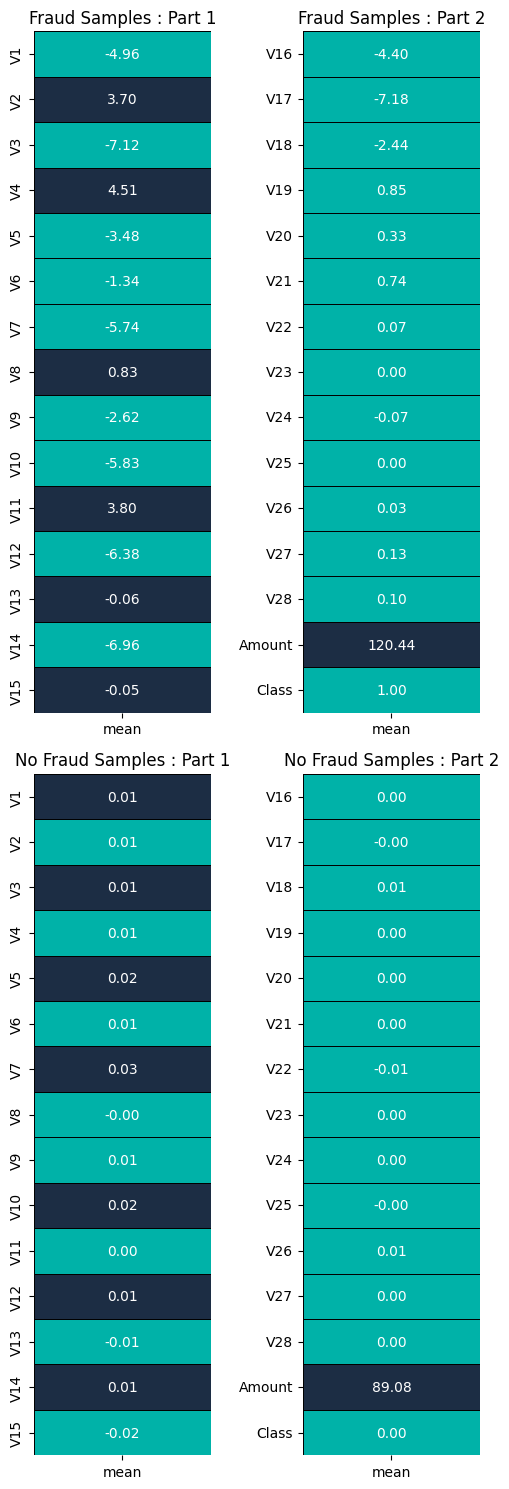

In [6]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#00B2A8','#1C2D44']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

**Mean** values of features for **Fraud** & **No Fraud** classes

# Data Visualization

### Target Variable Visualization (Class) : 

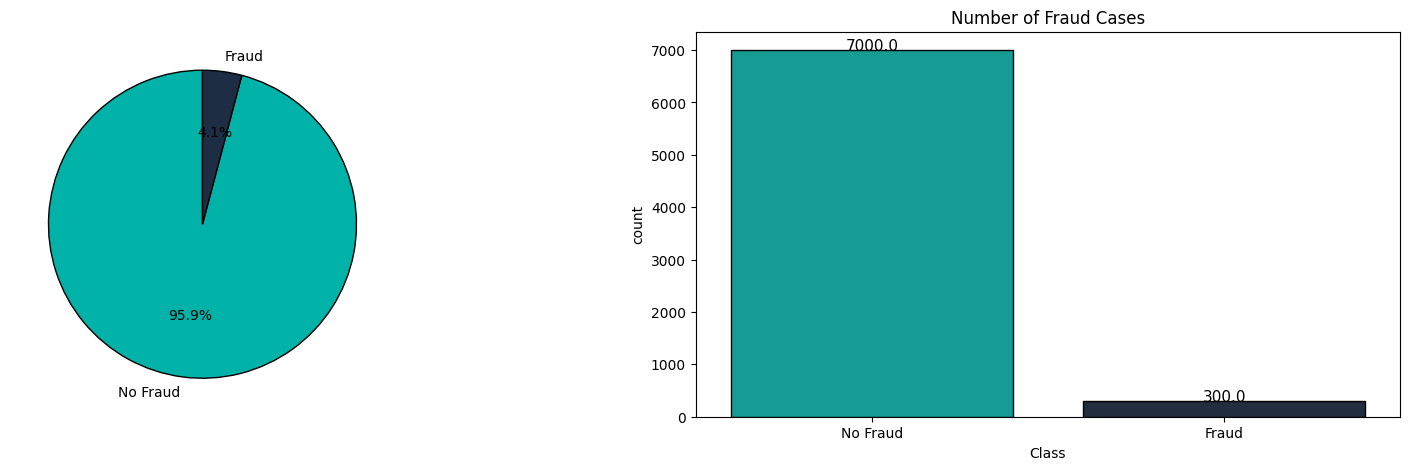

In [7]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100

fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize = (20,5)
)

plt.subplot(1,2,1)

plt.pie(
    fraud_percentage,
    labels = ['No Fraud','Fraud'], 
    autopct='%1.1f%%',
    startangle = 90,
    colors = colors,
    wedgeprops = {
        'edgecolor' : 'black',
        'linewidth': 1,
        'antialiased' : True
    }
)

plt.subplot(1,2,2)
ax = sns.countplot(
    x='Class', 
    data=data, 
    edgecolor = 'black',
    palette = colors
)

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)

ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

- The data is clearly **highly unbalanced** with majority of the transactions being **No Fraud**. 
- Due to highly unbalanced data, the classification model will bias its prediction towards the majority class, **No Fraud**. 
- Hence, data balancing becomes a crucial part in building a robust model. 

### Correlation Matrix :

<Axes: >

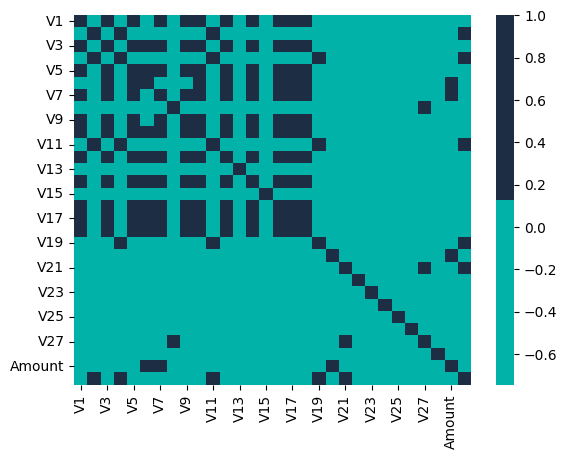

In [8]:
sns.heatmap(data.corr(),cmap = colors,cbar = True)

# Feature Selection: Simple Correlation vs. Anova

### Analysis of Variance (ANOVA)

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

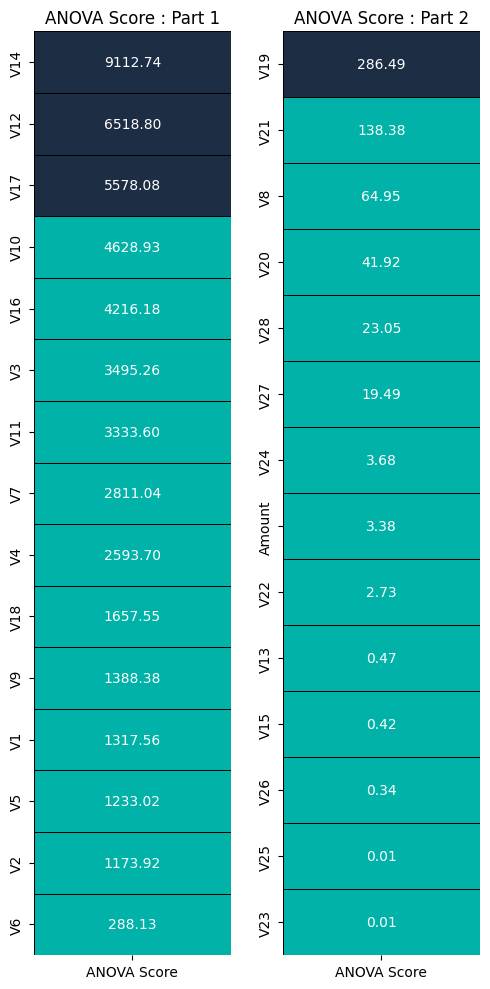

In [10]:
features = data.loc[:,:'Amount']
target = data.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

- The higher the ANOVA score, the higher the importance of that feature with respect to the target variable.
- From the above plot, we will reject features with values less than 50.
- In this case, we will create 2 models based on features selected from the **Correlation Plot** & **ANOVA Score**.

#### Dataset for Model based on Correlation Plot :

In [11]:
df1 = data[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','Class']].copy(deep = True)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,Class
0,-1.19,0.43,1.64,-1.85,-0.87,-0.20,-0.39,0.35,-1.10,-0.33,-0.68,-0.04,1.37,-0.73,-0.34,1.02,0.38,-1.09,0.36,0
1,1.97,-0.45,-1.23,0.14,-0.15,-0.54,-0.08,-0.11,0.97,-0.03,0.28,0.89,-0.58,0.32,-1.07,-0.34,-0.39,0.22,0.68,0
2,1.53,-1.30,-0.89,-2.50,0.80,3.35,-1.63,0.82,-1.88,1.47,-0.19,-0.98,0.56,-0.25,0.94,0.14,-0.08,0.36,0.13,0
3,-0.77,1.10,0.68,1.03,0.17,0.87,0.21,0.77,-0.56,-0.17,0.02,0.29,-0.82,0.64,-0.37,-0.61,0.28,0.25,1.33,0
4,-1.08,1.36,1.50,2.24,1.31,0.27,1.01,0.13,-1.56,0.48,-1.97,-1.82,-2.04,0.35,-1.16,1.02,-0.93,0.18,-2.10,0


#### Dataset for Model based on ANOVA Score :

In [12]:
df2 = data.copy(deep = True)
df2 = df2[list(featureScores[featureScores['ANOVA Score'] > 50].index)]
df2['Class'] = df1.Class
df2

,V14,V12,V17,V10,V16,V3,V11,V7,V4,V18,V9,V1,V5,V2,V6,V19,V21,V8,Class
0,-0.73,-0.04,0.38,-0.33,1.02,1.64,-0.68,-0.39,-1.85,-1.09,-1.10,-1.19,-0.87,0.43,-0.20,0.36,0.51,0.35,0
1,0.32,0.89,-0.39,-0.03,-0.34,-1.23,0.28,-0.08,0.14,0.22,0.97,1.97,-0.15,-0.45,-0.54,0.68,0.12,-0.11,0
2,-0.25,-0.98,-0.08,1.47,0.14,-0.89,-0.19,-1.63,-2.50,0.36,-1.88,1.53,0.80,-1.30,3.35,0.13,-0.41,0.82,0
3,0.64,0.29,0.28,-0.17,-0.61,0.68,0.02,0.21,1.03,0.25,-0.56,-0.77,0.17,1.10,0.87,1.33,0.01,0.77,0
4,0.35,-1.82,-0.93,0.48,1.02,1.50,-1.97,1.01,2.24,0.18,-1.56,-1.08,1.31,1.36,0.27,-2.10,0.25,0.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,-6.16,-3.58,-5.30,-2.86,-2.54,-1.82,1.62,-1.72,0.61,-2.19,0.01,-3.59,-1.19,0.78,-0.52,-0.09,0.35,0.13,1
7296,-2.97,-2.55,-4.91,-2.90,-4.70,-2.88,3.03,-3.80,1.72,-1.51,0.86,0.92,-3.02,0.34,-0.64,3.00,0.90,1.30,1
7297,-2.37,-0.69,1.76,-2.25,0.15,-2.97,-0.48,4.03,-0.28,1.08,-0.77,-0.36,0.37,1.13,-0.57,-0.39,0.11,-0.93,1
7298,-5.75,-3.27,-2.71,-3.22,-3.87,-3.91,1.29,-1.22,-0.07,-0.10,-2.77,-1.14,-0.04,1.93,-1.76,-0.72,0.10,0.36,1


# Data Balancing

- There are 2 common strategies:
    - **Undersampling** : Trim down the majority class
    - **Oversampling** : Increase the minority class
    
- We will use the combination of undersampling and oversampling.
- We will use **imblearn**.

In [13]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### Data Balancing for Model based on Correlation Plot :

In [14]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)

f1 = df1.iloc[:,:19].values
t1 = df1.iloc[:,19].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)

f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 3000, 1: 1500})

#### Data Balancing for Model based on ANOVA Score :

In [15]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:18].values
t2 = df2.iloc[:,18].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 3000, 1: 1500})

In [33]:
pd.concat([
pd.DataFrame(f1),
pd.DataFrame(t1)
],axis=1).to_csv('/Users/jd/Desktop/data_fraude.csv')

### Calculation for Data Balancing :

- **Sampling Strategy** : It is a ratio which is the common paramter for oversampling and undersampling.


- In this case,

    
    - **Majority Class : No Fraud Cases** : 7000 samples
    - **Minority Class : Fraud Cases** : 300 samples


### Undersampling : Trim down the majority class samples

- Sampling_Strategy = 0.1 
- The minority class becomes 10% of the majority class
- After undersampling, 

    - **Majority Class : No Fraud Cases** : 3000 samples
    - **Minority Class : Fraud Cases** : 300 samples


### Oversampling : Increase the minority class samples

- Sampling_Strategy = 0.5
- The minority class must become 50% of the majority class
- After oversampling, 

    - **Majority Class : No Fraud Cases** : 3000 samples
    - **Minority Class : Fraud Cases** : 1500 samples
    

- Final Class Samples :

    - **Majority Class : No Fraud Cases** : 3000 samples
    - **Minority Class : Fraud Cases** : 1500 samples

  

- For imbalanced datasets, we **duplicate the data** to deal with the potential bias in the predictions. 

- Due to this duplication process, we are using **synthetic data** for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.

- Thus, evaluating models using **accuracy** will be misleading. Instead, we will go for **confusion matrix, ROC-AUC graph and ROC-AUC score** for model evaluation.

# Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from scikitplot.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

- Splitting the data into **80 - 20 train - test** groups.

In [36]:
@ignore_warnings(category=ConvergenceWarning)
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,  n_repeats = 3, random_state = 1)
    print("AUC ROC Cross Validation: ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train, cv = cv, scoring = 'roc_auc').mean()))
    print("AUC ROC Test Set: ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
   # plot_roc_curve(classifier, x_test,y_test)
   # plt.title('ROC_AUC_Plot')
   # plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 1] Logistic Regression :

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
classifier_lr = LogisticRegression(random_state = 0, C=10, penalty = 'l2') 

In [ ]:
# precision (+) = TP / TP + FP |
# precision (-) = TN / TN + FN | cuantas clasificaciones de fraude fueron correctas
------------------------------- 
# recall (+) = TP / TP + FN    | cuantas transacciones fraudulentas clasifique correctamente
-------------------------------
# accuracy TP + TN / TN + TP + FN + FP |
-------------------------------
# hyper-paramter tuning: 1) Random 2) Grid search a:[1,2,3], b:[f,h,l], z:[r,t,h] 3) Optimizacion Bayesiana -- likelihood of the data 

#### Model based on Correlation Plot :

AUC ROC Cross Validation:  98.29%
AUC ROC Test Set:  93.60%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       613
           1       0.97      0.89      0.93       287

    accuracy                           0.95       900
   macro avg       0.96      0.94      0.95       900
weighted avg       0.96      0.95      0.95       900



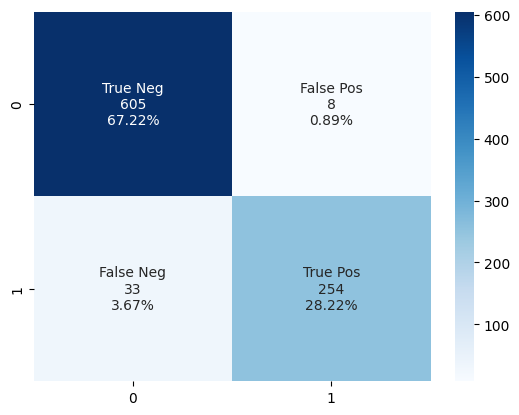

In [39]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

#### Model based on ANOVA Score :

AUC ROC Cross Validation:  98.72%
AUC ROC Test Set:  94.02%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       613
           1       0.98      0.89      0.93       287

    accuracy                           0.96       900
   macro avg       0.97      0.94      0.95       900
weighted avg       0.96      0.96      0.96       900



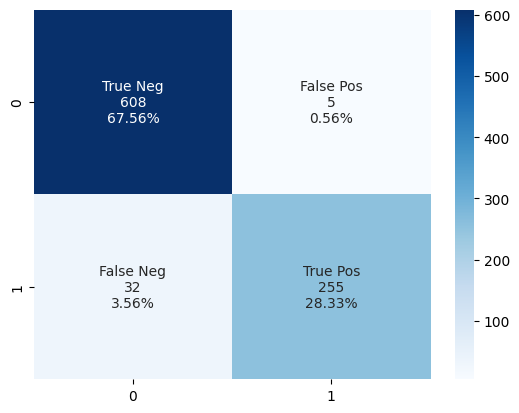

In [40]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

### 2] Support Vector Classifier :

In [41]:
from sklearn.svm import SVC

In [42]:
classifier_svc = SVC(kernel = 'linear', C = 0.1)

#### Model based on Correlation Plot :

AUC ROC Cross Validation:  98.10%
AUC ROC Test Set:  92.96%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       613
           1       0.99      0.86      0.92       287

    accuracy                           0.95       900
   macro avg       0.96      0.93      0.94       900
weighted avg       0.96      0.95      0.95       900



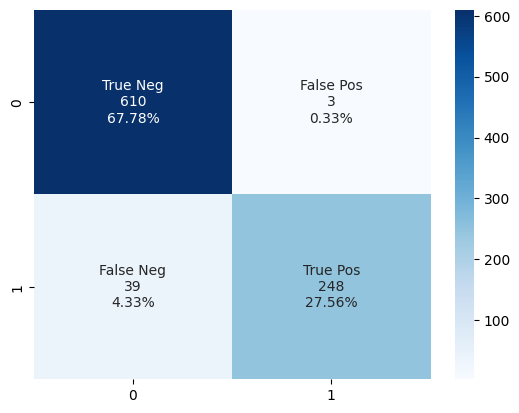

In [43]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

#### Model based on ANOVA Score :

AUC ROC Cross Validation:  98.64%
AUC ROC Test Set:  93.22%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       613
           1       0.99      0.87      0.93       287

    accuracy                           0.96       900
   macro avg       0.97      0.93      0.95       900
weighted avg       0.96      0.96      0.95       900



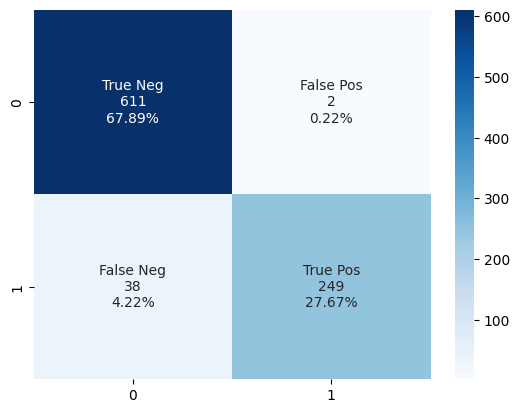

In [44]:
model(classifier_svc, x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

### 3] Decision Tree Classifier :

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier_dt = DecisionTreeClassifier(random_state = 1000, max_depth = 4, min_samples_leaf = 1)

#### Model based on Correlation Plot :

AUC ROC Cross Validation:  96.60%
AUC ROC Test Set:  92.49%
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       613
           1       0.95      0.87      0.91       287

    accuracy                           0.94       900
   macro avg       0.95      0.92      0.93       900
weighted avg       0.94      0.94      0.94       900



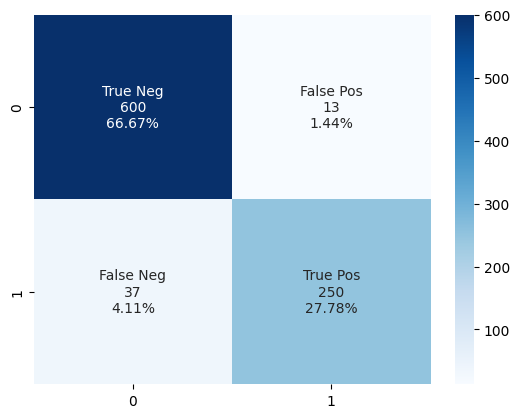

In [47]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

#### Model based on ANOVA Score :

AUC ROC Cross Validation:  97.88%
AUC ROC Test Set:  92.96%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       613
           1       0.99      0.86      0.92       287

    accuracy                           0.95       900
   macro avg       0.96      0.93      0.94       900
weighted avg       0.96      0.95      0.95       900



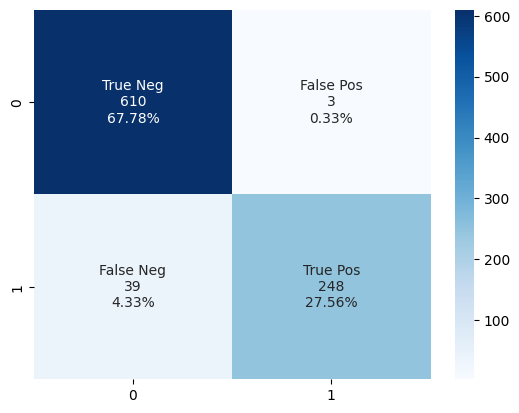

In [48]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

### 4] Random Forest Classifier : 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
classifier_rf = RandomForestClassifier(max_depth = 4, random_state = 0)

#### Model based on Correlation Plot :

AUC ROC Cross Validation:  98.03%
AUC ROC Test Set:  92.78%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       613
           1       1.00      0.86      0.92       287

    accuracy                           0.95       900
   macro avg       0.97      0.93      0.94       900
weighted avg       0.96      0.95      0.95       900



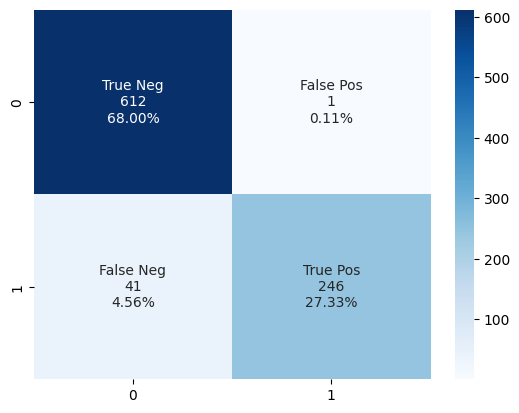

In [51]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

#### Model based on ANOVA Score :

AUC ROC Cross Validation:  98.41%
AUC ROC Test Set:  92.78%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       613
           1       1.00      0.86      0.92       287

    accuracy                           0.95       900
   macro avg       0.97      0.93      0.94       900
weighted avg       0.96      0.95      0.95       900



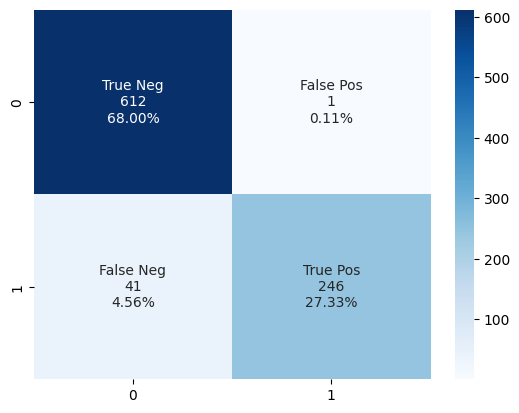

In [52]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

### 5] K-Nearest Neighbors :

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

#### Model based on Correlation Plot :

AUC ROC Cross Validation:  99.54%
AUC ROC Test Set:  98.68%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       613
           1       0.95      1.00      0.97       287

    accuracy                           0.98       900
   macro avg       0.98      0.99      0.98       900
weighted avg       0.98      0.98      0.98       900



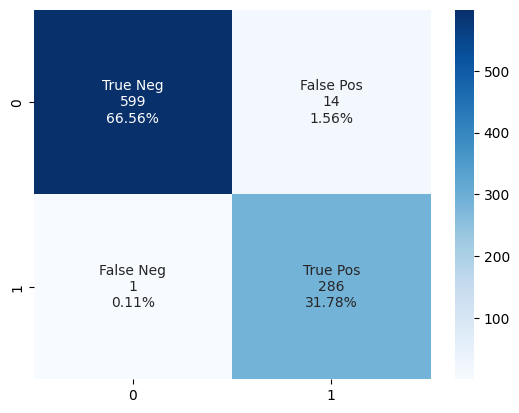

In [55]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

#### Model based on ANOVA Score :

AUC ROC Cross Validation:  99.58%
AUC ROC Test Set:  99.43%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       613
           1       0.98      1.00      0.99       287

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



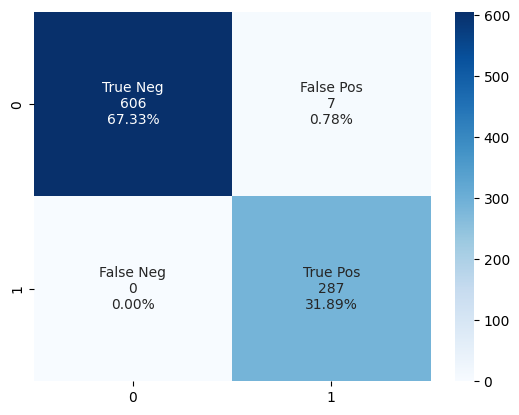

In [56]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)

### References :
- https://www.chargebackgurus.com/blog/credit-card-fraud-detection
- https://www.bajajfinserv.in/credit-card-fraud-in-india
- https://www.fortunebusinessinsights.com/industry-reports/fraud-detection-and-prevention-market-100231